# EDA(Exploratory Data Analysis)


In [67]:
#필요한 패키지를 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (12, 12)

import warnings
warnings.filterwarnings('ignore')

# 0. 데이터 불러오기

In [68]:
## 데이터 불러오기
raw_data = pd.read_csv('data/최종데이터/최종_열삭제전.csv', encoding='utf-8', index_col=0)

raw_data

,광역시도명,날짜,요일,시간대별 시간,업종명,계절,공휴일,기념일,기온,풍속,...,눈비,강수량,확진자수,SO2,CO,O3,NO2,PM25,적설,주문건수
0,경기도,2019-07-17,수,0,도시락,여름,0,0,22.86,0.54,...,0,0.0,0.0,0.004,0.628,0.025,0.027,54.272,0.0,1
1,경기도,2019-07-17,수,11,도시락,여름,0,0,26.80,1.34,...,0,0.0,0.0,0.003,0.544,0.046,0.018,39.076,0.0,13
2,경기도,2019-07-17,수,12,도시락,여름,0,0,27.26,1.46,...,0,0.0,0.0,0.003,0.526,0.057,0.018,40.727,0.0,14
3,경기도,2019-07-17,수,13,도시락,여름,0,0,27.52,1.48,...,0,0.0,0.0,0.003,0.531,0.066,0.017,42.947,0.0,13
4,경기도,2019-07-17,수,14,도시락,여름,0,0,27.44,1.38,...,1,2.2,0.0,0.004,0.539,0.070,0.018,45.211,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226858,서울,2020-09-30,수,19,회,가을,1,0,19.00,2.70,...,1,29.5,30.0,0.003,0.428,0.034,0.018,21.120,0.0,7
226859,서울,2020-09-30,수,20,회,가을,1,0,18.40,1.90,...,1,4.5,30.0,0.003,0.420,0.032,0.016,20.040,0.0,11
226860,서울,2020-09-30,수,21,회,가을,1,0,18.20,0.70,...,0,0.0,30.0,0.003,0.444,0.023,0.018,16.680,0.0,3
226861,서울,2020-09-30,수,22,회,가을,1,0,17.60,1.50,...,0,0.0,30.0,0.002,0.424,0.017,0.019,14.320,0.0,7


In [69]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226863 entries, 0 to 226862
Data columns (total 24 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   광역시도명    226863 non-null  object 
 1   날짜       226863 non-null  object 
 2   요일       226863 non-null  object 
 3   시간대별 시간  226863 non-null  int64  
 4   업종명      226863 non-null  object 
 5   계절       226863 non-null  object 
 6   공휴일      226863 non-null  int64  
 7   기념일      226863 non-null  int64  
 8   기온       226863 non-null  float64
 9   풍속       226863 non-null  float64
 10  습도       226863 non-null  float64
 11  PM10     226863 non-null  float64
 12  운량       226863 non-null  float64
 13  날씨       226863 non-null  int64  
 14  눈비       226863 non-null  int64  
 15  강수량      226863 non-null  float64
 16  확진자수     226863 non-null  float64
 17  SO2      226863 non-null  float64
 18  CO       226863 non-null  float64
 19  O3       226863 non-null  float64
 20  NO2      226863 non-null  

# 1. 데이터 확인


<AxesSubplot:>

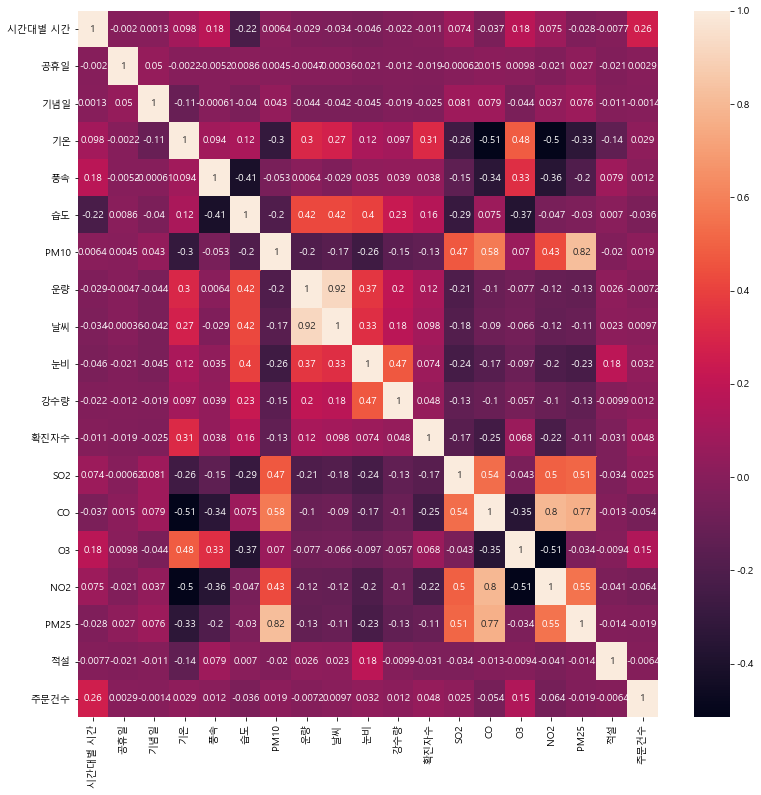

In [70]:
plt.figure(figsize=(13, 13))
sns.heatmap(raw_data.corr(), annot=True)

### 1-1) SO2(이산화 황), CO(일산화탄소), O3(오존), NO2(이산화질소), PM25(초미세먼지)
* 위의 변수(대기 데이터)들은 배달에 많은 영향을 주지 않는다고 판단하였고, 또한 PM10으로 충분히 설명 가능하다고 판단하여 삭제

### 1-2) 적설
* 눈이 안온 날이 훨씬 많고, 강수량 컬럼과 합쳐 눈비 컬럼으로 파생변수 생성하였으므로, 삭제

In [71]:
final_data = raw_data.drop(['SO2', 'CO', 'O3', 'NO2', 'PM25', '적설'], axis=1)

### 1-3) 심부름
* 데이터 담당자에게 문의 결과 음식과 무관한 자동차 부품, 핸드폰과 같은 배달 주문이므로 제외

In [72]:
delete_index = final_data.loc[final_data['업종명']=='심부름'].index
final_data = final_data.drop(delete_index, axis=0)

final_data.reset_index(drop=True, inplace=True)

final_data

,광역시도명,날짜,요일,시간대별 시간,업종명,계절,공휴일,기념일,기온,풍속,습도,PM10,운량,날씨,눈비,강수량,확진자수,주문건수
0,경기도,2019-07-17,수,0,도시락,여름,0,0,22.86,0.54,91.2,79.512,6.4,3,0,0.0,0.0,1
1,경기도,2019-07-17,수,11,도시락,여름,0,0,26.80,1.34,71.6,58.013,9.2,4,0,0.0,0.0,13
2,경기도,2019-07-17,수,12,도시락,여름,0,0,27.26,1.46,71.4,57.240,9.8,4,0,0.0,0.0,14
3,경기도,2019-07-17,수,13,도시락,여름,0,0,27.52,1.48,69.8,60.360,9.8,4,0,0.0,0.0,13
4,경기도,2019-07-17,수,14,도시락,여름,0,0,27.44,1.38,72.6,64.595,10.0,4,1,2.2,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221205,서울,2020-09-30,수,19,회,가을,1,0,19.00,2.70,90.0,31.320,10.0,4,1,29.5,30.0,7
221206,서울,2020-09-30,수,20,회,가을,1,0,18.40,1.90,91.0,27.520,5.0,2,1,4.5,30.0,11
221207,서울,2020-09-30,수,21,회,가을,1,0,18.20,0.70,91.0,22.720,7.0,3,0,0.0,30.0,3
221208,서울,2020-09-30,수,22,회,가을,1,0,17.60,1.50,92.0,19.600,6.0,3,0,0.0,30.0,7


In [73]:
final_data.to_csv('data/최종데이터/최종_열삭제후_dummy전.csv', encoding='utf-8')

# 2. 데이터 탐색

## 2.1 전체 데이터

### 전체 주문건수, 기온, 미세먼지, 코로나 그래프

In [7]:
final_data['날짜'] = pd.to_datetime(final_data['날짜'])

In [8]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221210 entries, 0 to 221209
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   광역시도명    221210 non-null  object        
 1   날짜       221210 non-null  datetime64[ns]
 2   요일       221210 non-null  object        
 3   시간대별 시간  221210 non-null  int64         
 4   업종명      221210 non-null  object        
 5   계절       221210 non-null  object        
 6   공휴일      221210 non-null  int64         
 7   기념일      221210 non-null  int64         
 8   기온       221210 non-null  float64       
 9   풍속       221210 non-null  float64       
 10  습도       221210 non-null  float64       
 11  PM10     221210 non-null  float64       
 12  운량       221210 non-null  float64       
 13  날씨       221210 non-null  int64         
 14  눈비       221210 non-null  int64         
 15  강수량      221210 non-null  float64       
 16  확진자수     221210 non-null  float64       
 17  주문건수     2

In [9]:
# yaar, month 열 생성
final_data['year'] = final_data['날짜'].dt.year
final_data['month'] = final_data['날짜'].dt.month

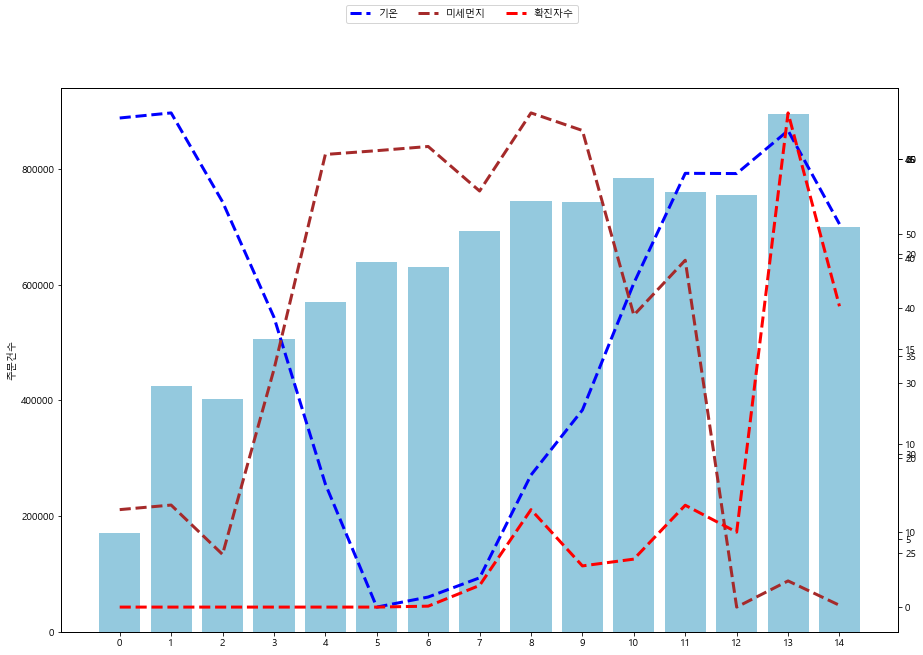

In [10]:
fig, axes = plt.subplots(figsize=(15, 10))

temp = final_data.groupby(['year','month']).agg({'주문건수':'sum','기온':'mean','PM10':'mean','확진자수':'mean'}).reset_index()
index = temp.index 

sns.barplot(x=temp.index, y=temp['주문건수'], ax=axes, color='skyblue')

ax2 = axes.twinx()
ax2.plot(np.arange(len(index)), temp['기온'], color="b", linestyle='--',  linewidth=3, label='기온')

ax3 = axes.twinx()
ax3.plot(np.arange(len(index)), temp['PM10'], color="brown", linestyle='--',  linewidth=3,label='미세먼지')

ax4 = axes.twinx()
ax4.plot(np.arange(len(index)), temp['확진자수'], color="r", linestyle='--',  linewidth=3,label='확진자수')

fig.legend(loc='upper center', ncol=4)
plt.show()

### 업종별 주문건수, 기온, 미세먼지, 코로나 그래프

15it [00:02,  6.54it/s]


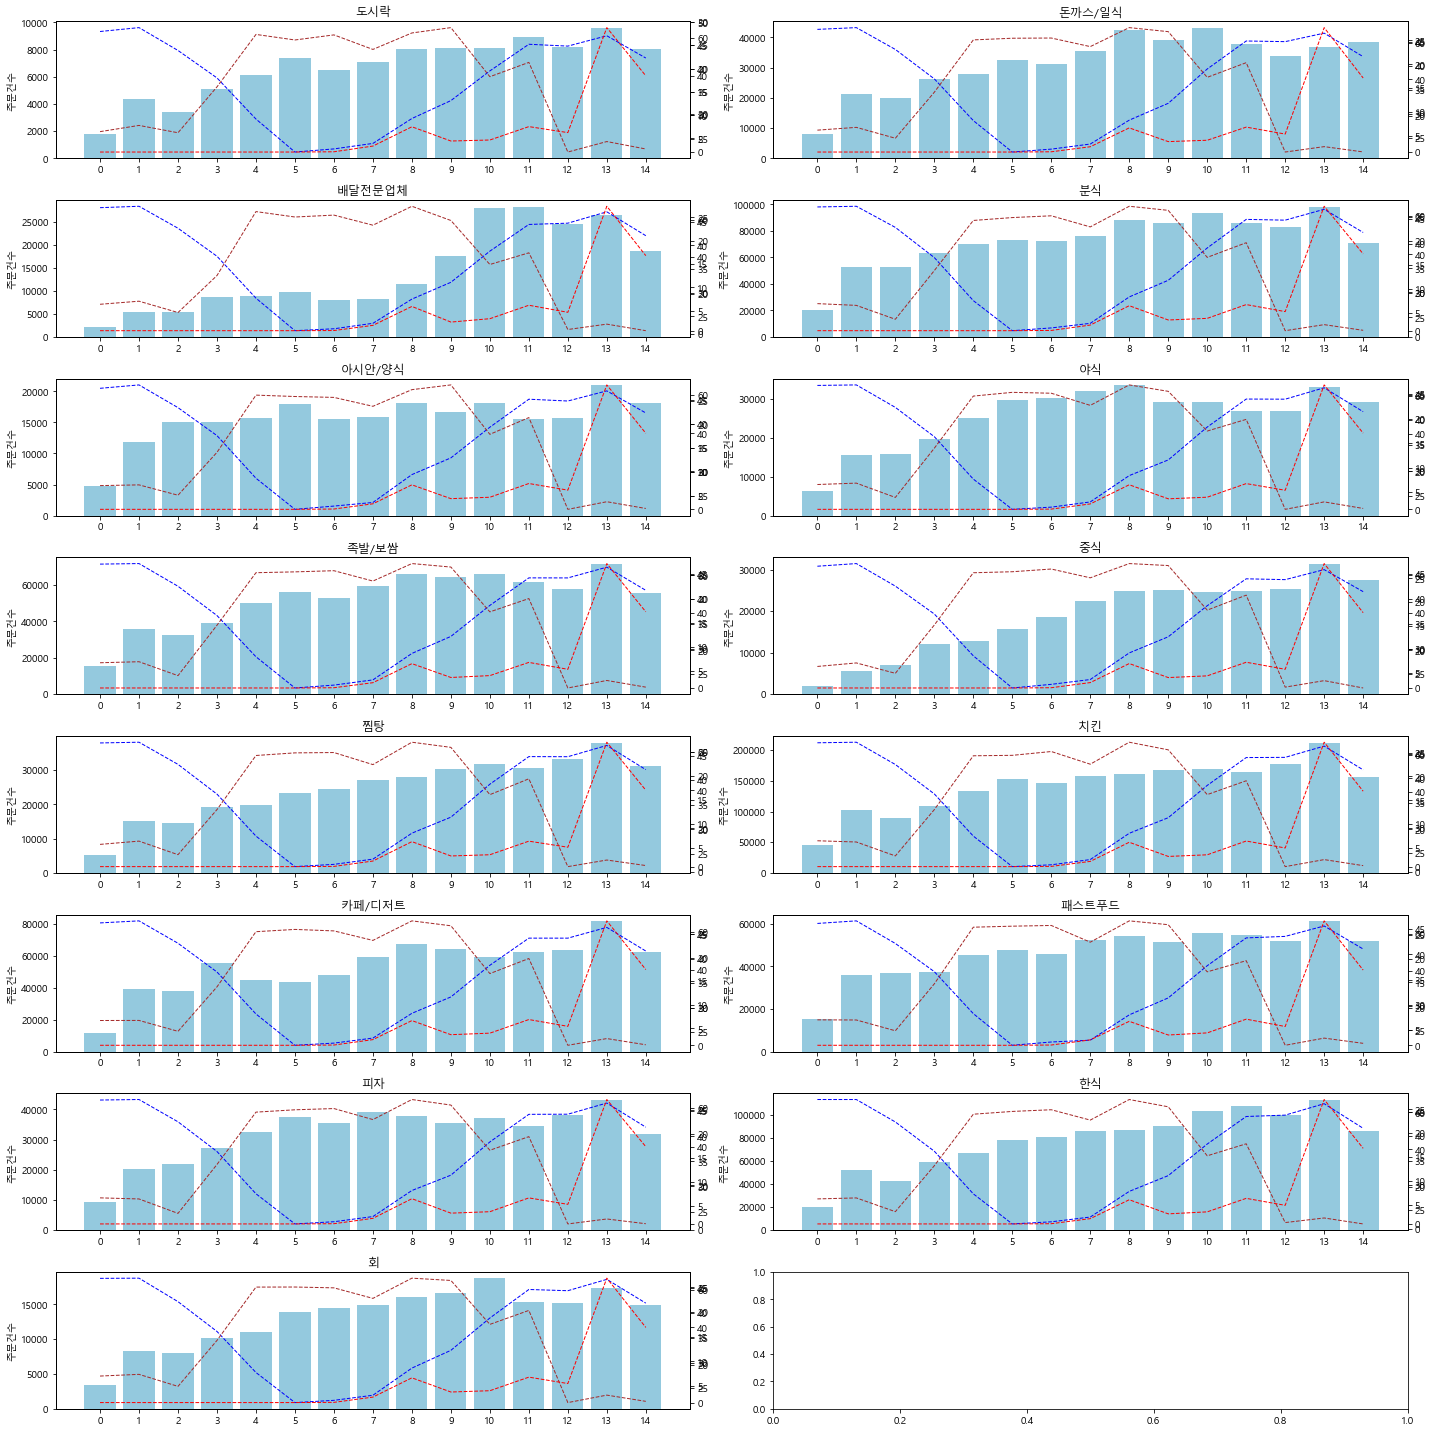

In [11]:
import time
from tqdm import tqdm

fig, axes = plt.subplots(8, 2, figsize=(20, 20))
ax = axes.ravel()

columns = np.unique(final_data['업종명'])
temp = final_data.groupby(['year','month','업종명']).agg({'주문건수':'sum','기온':'mean','PM10':'mean','확진자수':'mean'}).reset_index()

for i, column in tqdm(enumerate(columns)):
    ax[i].set_title(columns[i])
    tt = temp.loc[temp['업종명']==column].reset_index()
    sns.barplot(x=tt.index, y=tt['주문건수'], ax=ax[i], color='skyblue')

    ax2 = ax[i].twinx()
    ax2.plot(np.arange(len(tt.index)), tt['기온'], color="b", linestyle='--',  linewidth=1, label='기온')

    ax3 = ax[i].twinx()
    ax3.plot(np.arange(len(tt.index)), tt['PM10'], color="brown", linestyle='--',  linewidth=1,label='미세먼지')

    ax4 = ax[i].twinx()
    ax4.plot(np.arange(len(tt.index)), tt['확진자수'], color="r", linestyle='--',  linewidth=1,label='확진자수')

plt.tight_layout()        

### 업종별 주문건수 막대 그래프

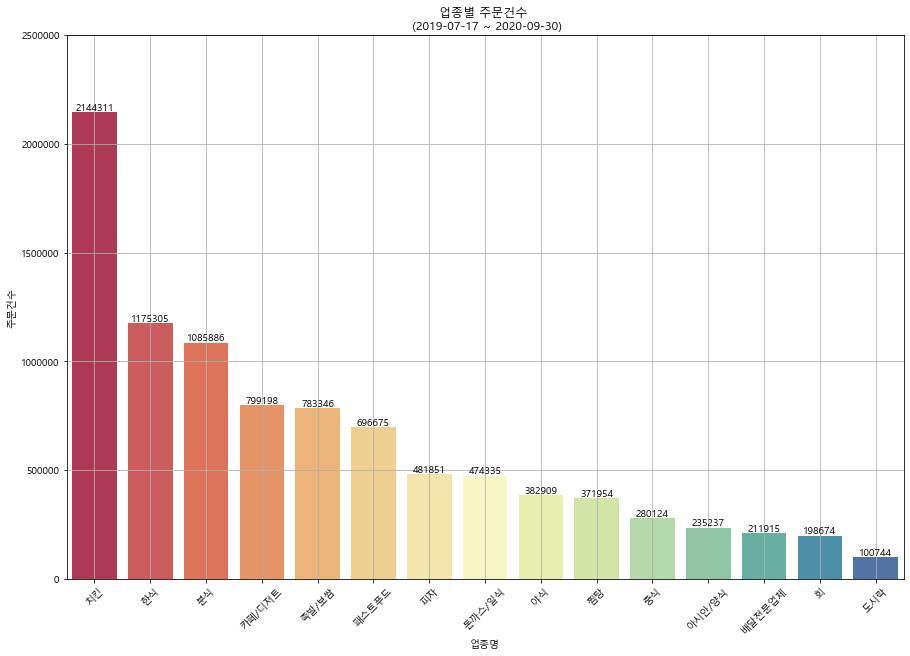

In [12]:
# 날짜 형변환
final_data['날짜'] = pd.to_datetime(final_data['날짜'])

tmp = final_data.groupby(['업종명']).sum()[['주문건수']].sort_values(by='주문건수', ascending=False)

fig, ax = plt.subplots(figsize=(15, 10))

plt.title('업종별 주문건수 \n (2019-07-17 ~ 2020-09-30)')
sns.barplot(data=tmp, x=tmp.index, y='주문건수', palette='Spectral', ax=ax)

x = np.arange(len(tmp.index))
y = tmp['주문건수']

for j, v in enumerate(x):
        plt.text(v, y[j], y[j],
               fontsize=10, color='black', 
               horizontalalignment='center',
               verticalalignment='bottom')
        
        
ax.ticklabel_format(style='plain', axis='y')
plt.yticks(np.arange(0, 3000000, 500000))
plt.xticks(rotation=45)
plt.grid()
plt.show()

### 업종별 주문건수 히스토그램

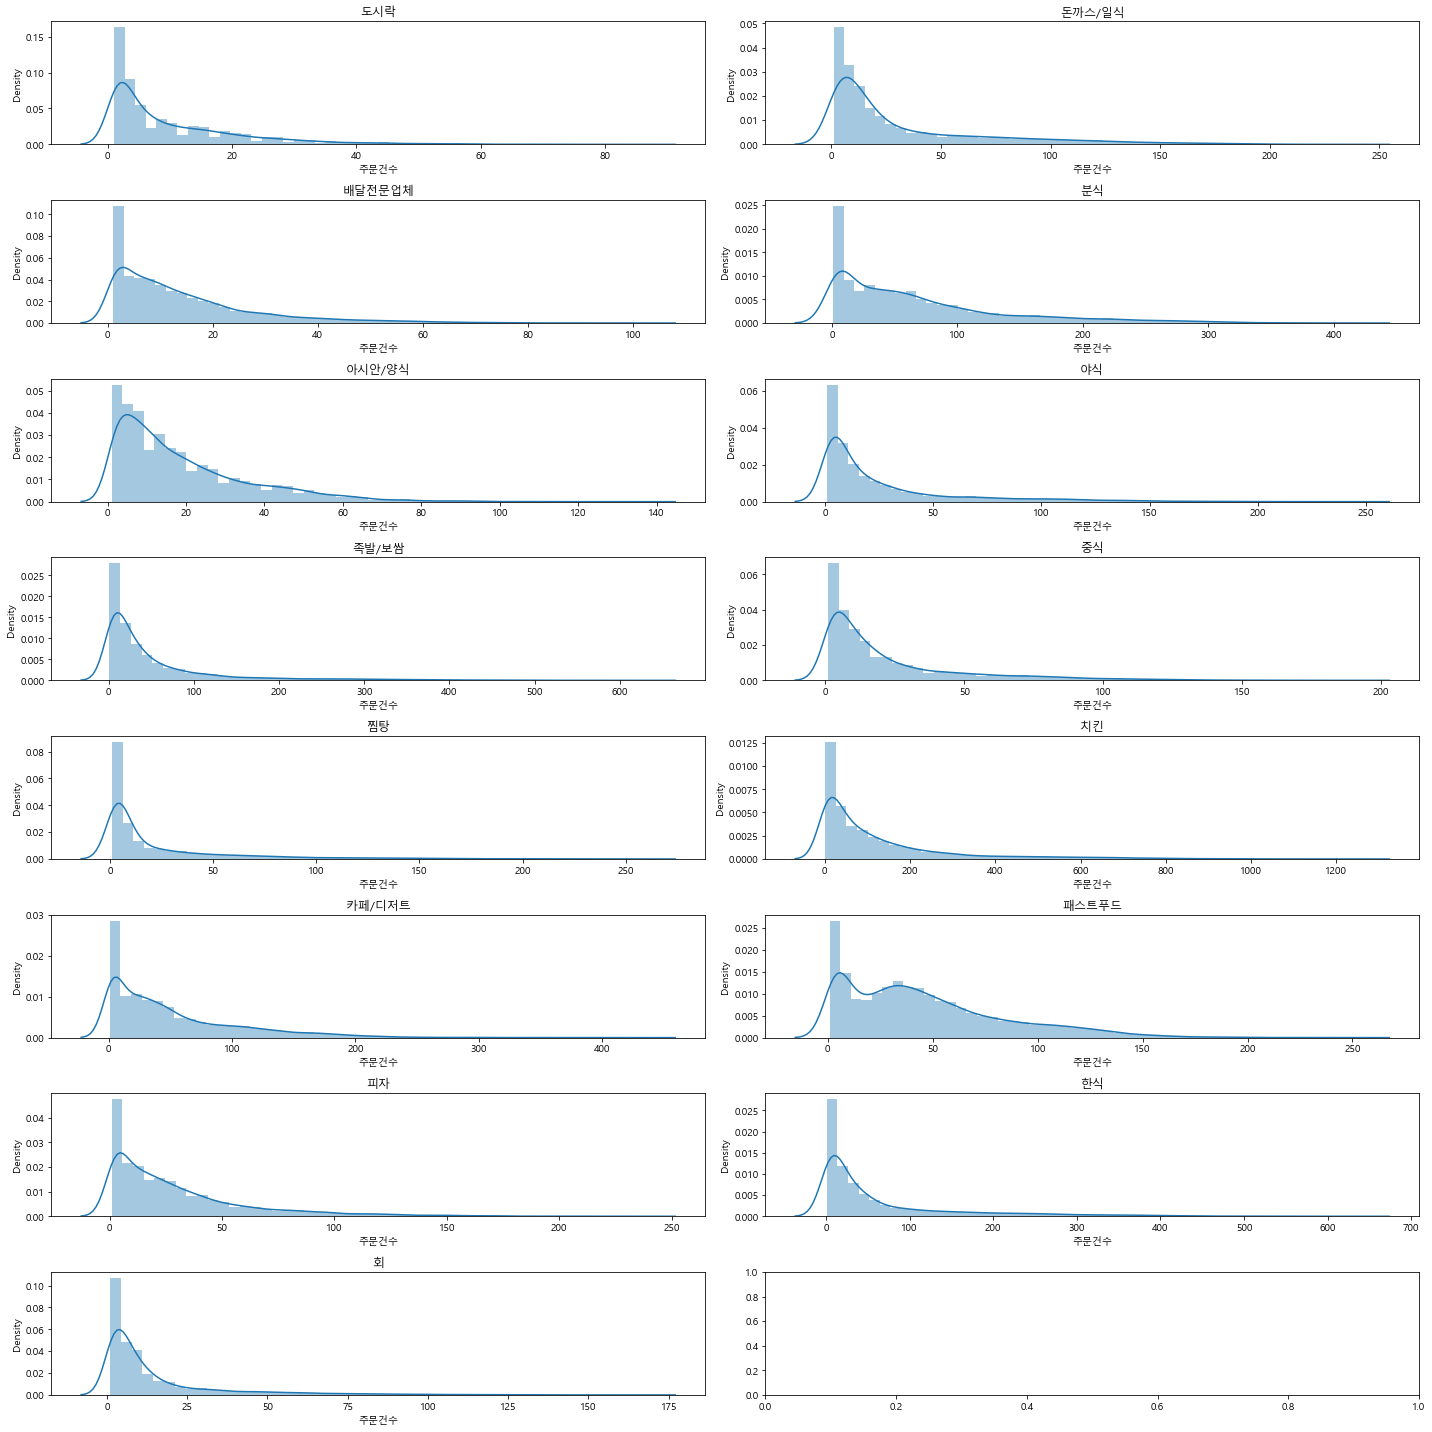

In [13]:
columns = np.unique(final_data['업종명'])

fig, axes = plt.subplots(8, 2, figsize=(20, 20))

ax = axes.ravel()

for i, column in enumerate(columns):
    ax[i].set_title(columns[i])
    sns.distplot(
        final_data.loc[(final_data['업종명']==columns[i])]['주문건수'], ax=ax[i])
    plt.tight_layout()

##### Log

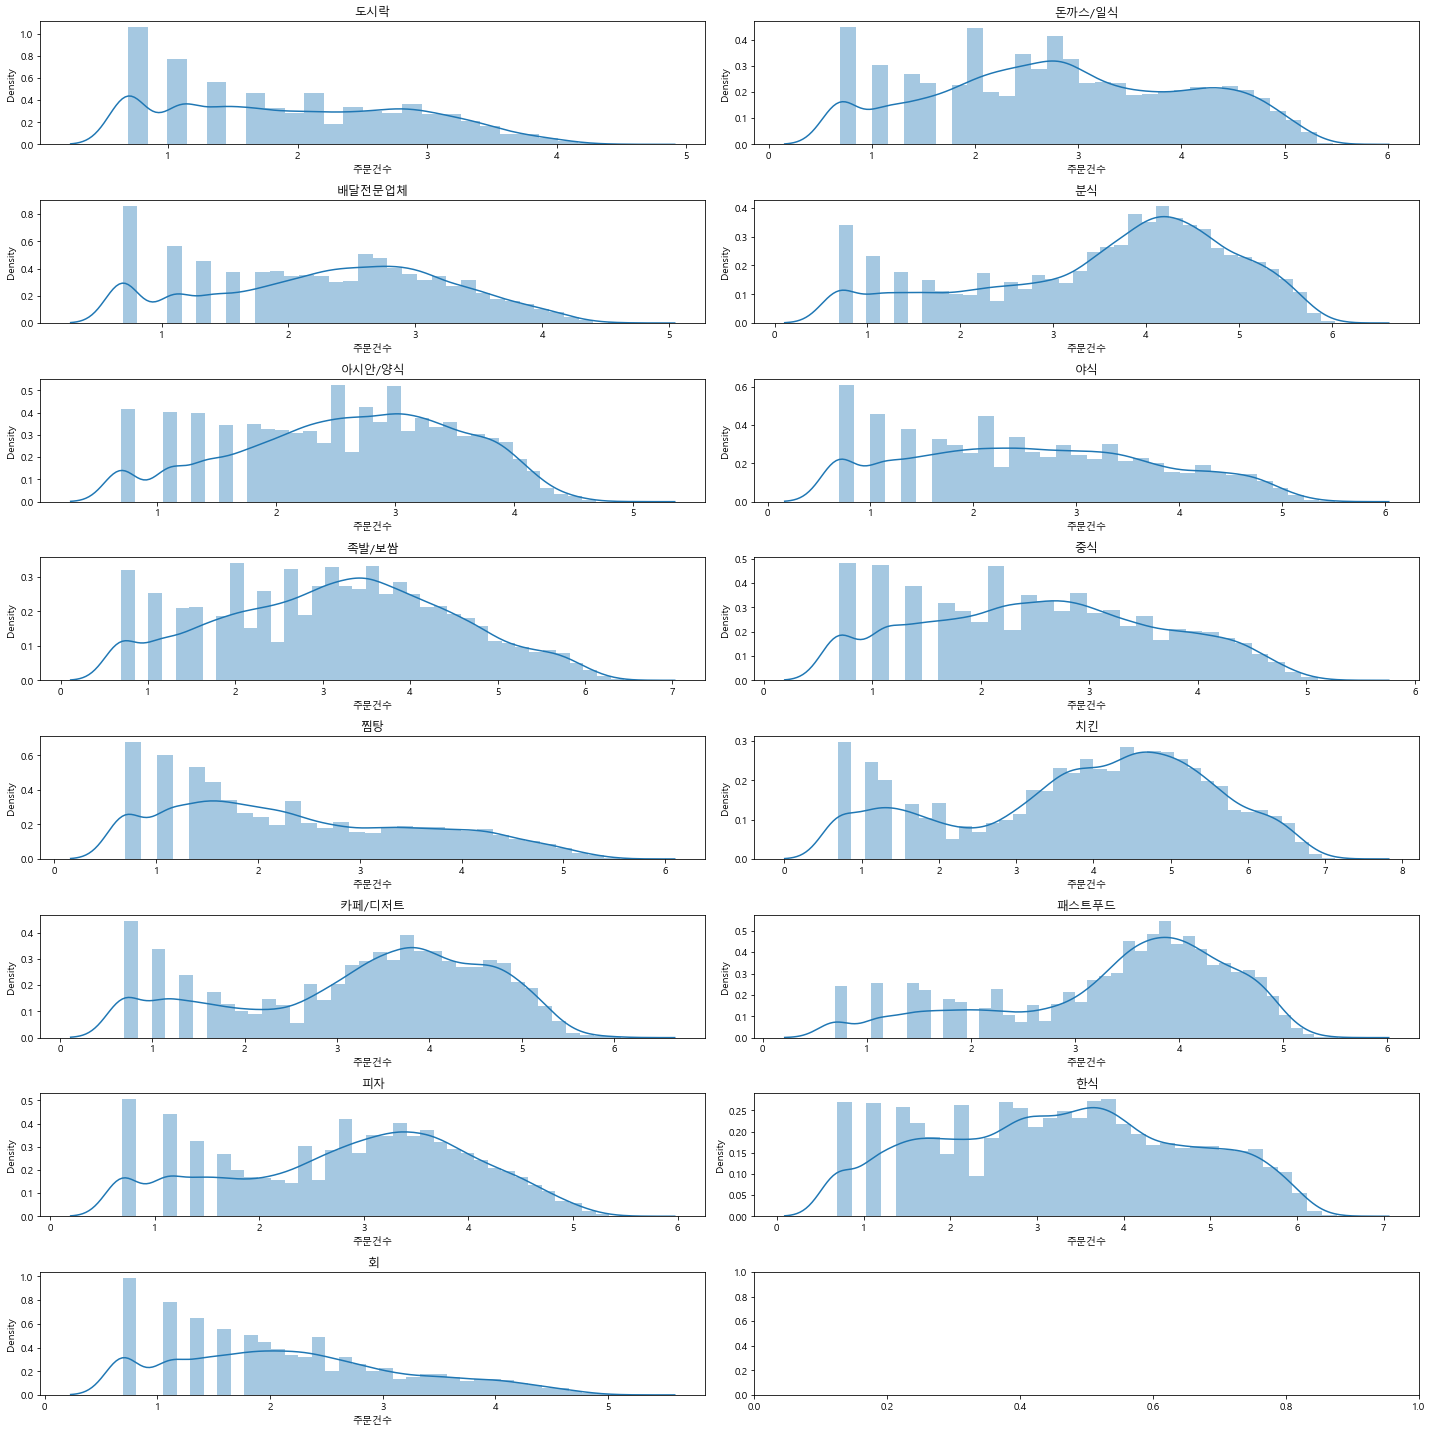

In [14]:
columns = np.unique(final_data['업종명'])

fig, axes = plt.subplots(8, 2, figsize=(20, 20))

ax = axes.ravel()

for i, column in enumerate(columns):
    ax[i].set_title(columns[i])
    sns.distplot(np.log1p(final_data.loc[(final_data['업종명']==columns[i])]['주문건수']), ax=ax[i])
    plt.tight_layout()

### 업종별 주문건수(Log) KDE 플롯

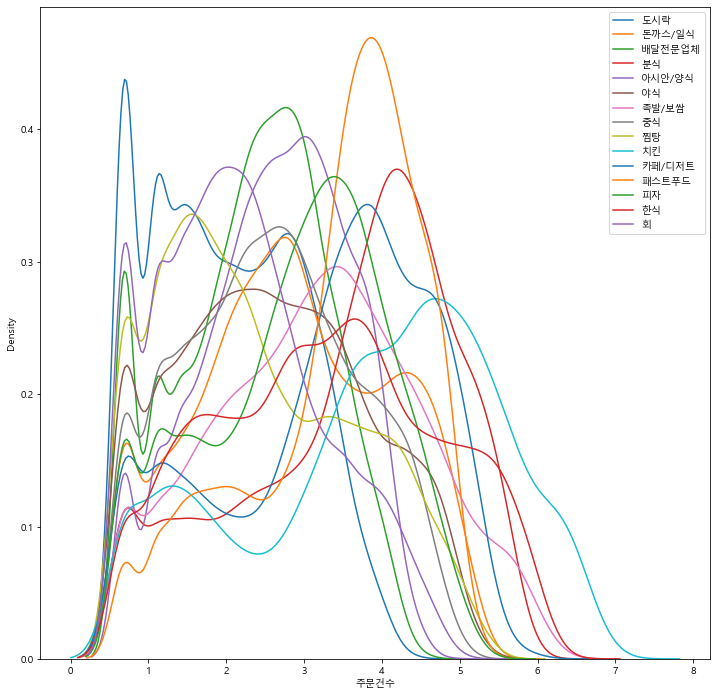

In [15]:
for i, column in enumerate(columns):
    sns.kdeplot(np.log1p(final_data.loc[(final_data['업종명']==columns[i])]['주문건수']), shade=False, label=columns[i])
    
plt.legend()

### 업종별 주문건수 바이올린 플롯

<AxesSubplot:xlabel='업종명', ylabel='주문건수'>

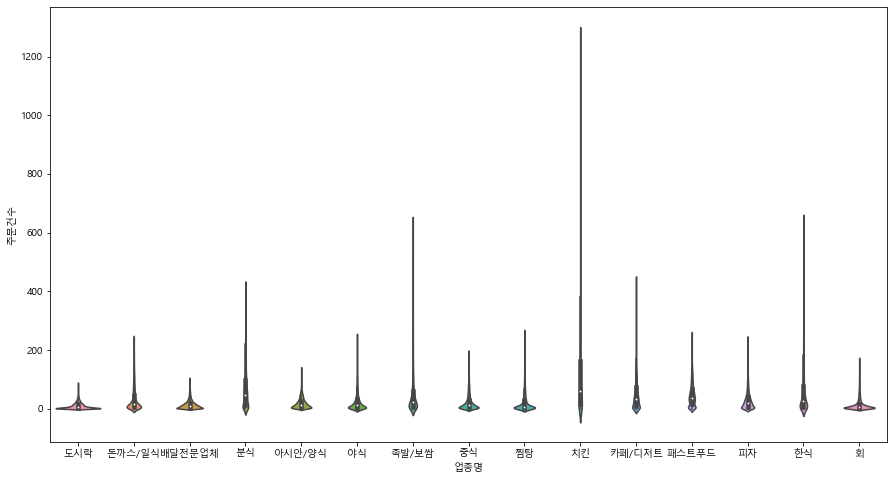

In [16]:
plt.figure(figsize=(15,8))
sns.violinplot(x='업종명', y='주문건수', data=final_data)

### 시간대별 전체 주문건수

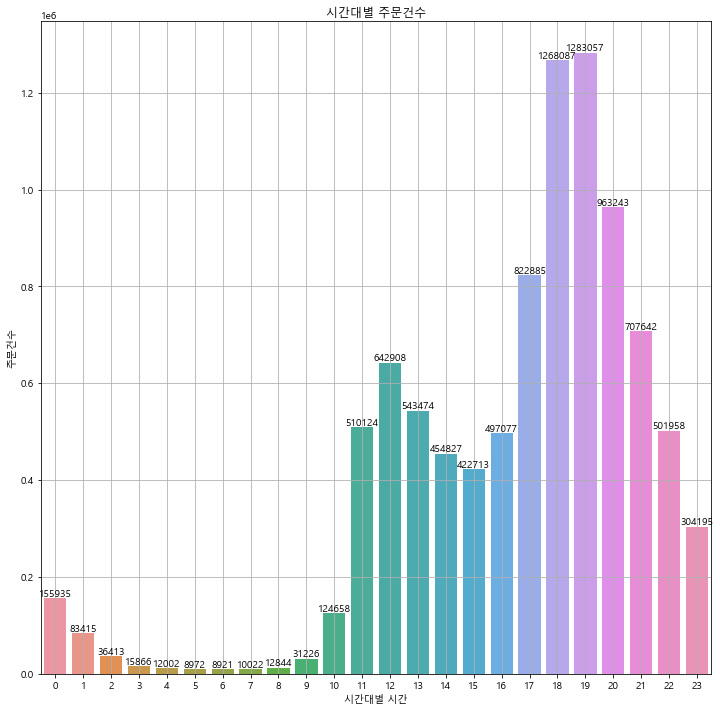

In [17]:
temp = final_data.groupby('시간대별 시간').agg({'주문건수':'sum'}).reset_index()
sns.barplot(x='시간대별 시간', y='주문건수', data=temp)

plt.title('시간대별 주문건수')
plt.grid()
x = np.arange(len(temp.index))
y = temp['주문건수']
for j, v in enumerate(x):
        plt.text(v, y[j], y[j],
               fontsize=10, color='black', 
               horizontalalignment='center',
               verticalalignment='bottom')

## 2.2 연도별 비교

### 업종별 주문건수 막대 그래프

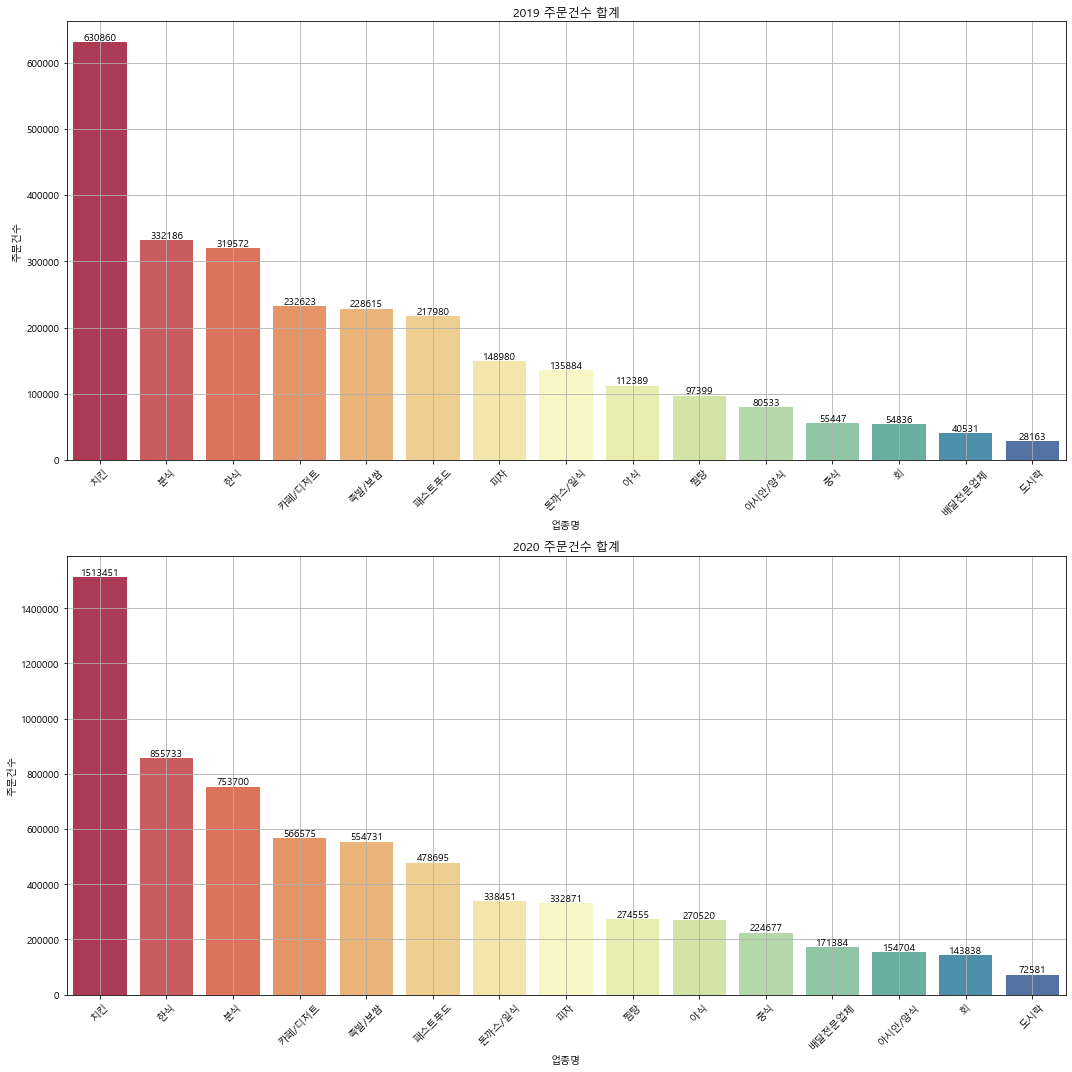

In [18]:
year = [2019, 2020]
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

for ax, yr in zip(axes.ravel(),year):
    temp = final_data.loc[final_data['날짜'].dt.year == yr].groupby(['업종명']).sum()[['주문건수']].sort_values(by='주문건수', ascending=False)
    index = temp.index
    sns.barplot(x=index, y=temp['주문건수'],data=temp, palette='Spectral', ax=ax)

    
    x = np.arange(len(temp.index))
    y = temp['주문건수']

    for j, v in enumerate(x):
        ax.text(v, y[j], y[j],
               fontsize=10, color='black', 
               horizontalalignment='center',
               verticalalignment='bottom')
        
        ax.ticklabel_format(style='plain', axis='y')
        ax.set_xticklabels(temp.index, rotation=45)
        ax.set_title(str(yr)+' '+'주문건수 합계')
        ax.grid()
plt.tight_layout()

### 전 업종 시간대별 주문건수비교 막대 그래프

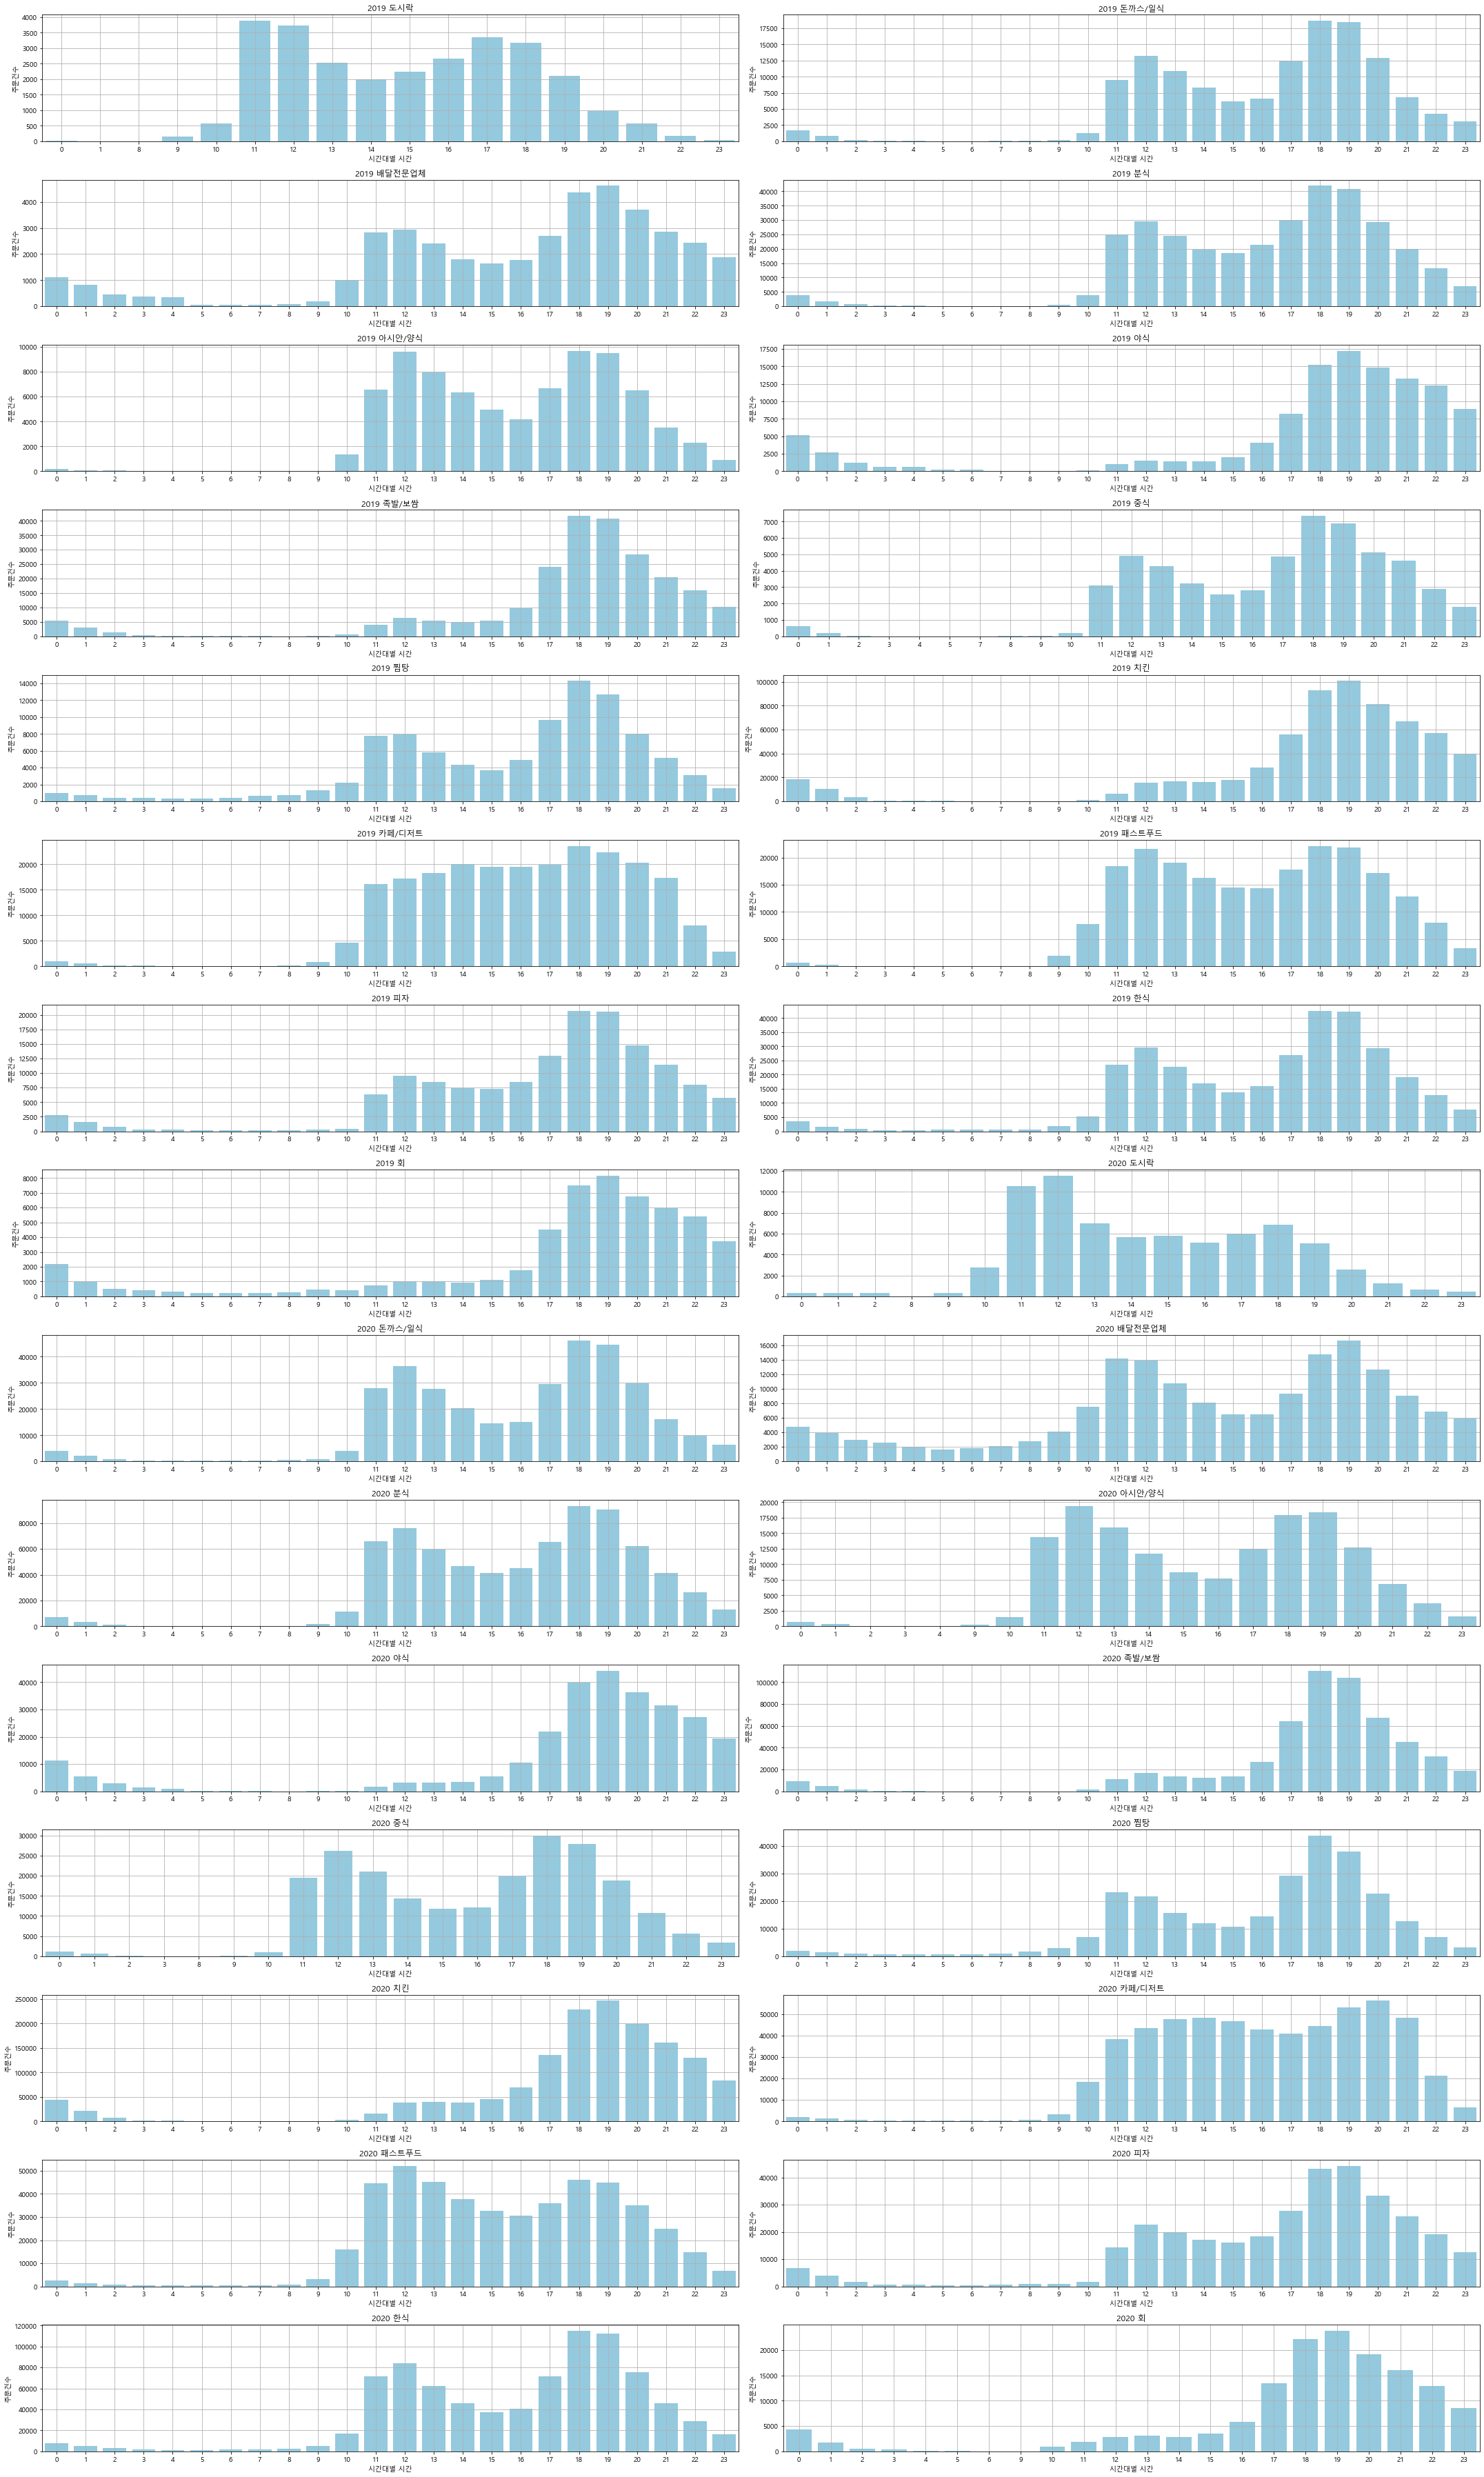

In [19]:
year = [2019,2020]
columns = np.unique(final_data['업종명'])
fig, axes = plt.subplots(15, 2, figsize=(30, 50))
ax = axes.ravel()
i=0
for yr in year:
    # 각 연도별 주문건수 합계 테이블 저장
    temp = final_data.loc[final_data['날짜'].dt.year == yr].groupby(['업종명', '시간대별 시간']).sum()[['주문건수']].sort_values(by='주문건수', ascending=False).reset_index()
    # 각 업종별 시간대별 시간 - 주문건수 그래프 출력
    for column in columns:
        ax[i].set_title(str(yr) +" "+ column)
        tt = temp.loc[temp['업종명'] == column][['시간대별 시간', '주문건수']]
        sns.barplot(data=tt, x='시간대별 시간', y='주문건수', color='skyblue', ax=ax[i])
        ax[i].grid()
        i +=1
        
plt.tight_layout()

## 3.1 지역별 비교

### 지역 비교를 위한 사용자 함수 정의

In [20]:
### 사용자 함수 정의

def bar_plotting(df=None, X=None, aggfunc=sum, figsize=(12, 10)):
    
    area = ['서울', '경기도']
    
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    for i, ax in enumerate(axes.ravel()):
        
        tmd_df = df.loc[df['광역시도명']==area[i]]
        
        if X == '계절':
            data = np.round(tmd_df.groupby(X).agg({'주문건수':aggfunc}).reindex(['봄', '여름', '가을', '겨울']), 3)
        elif X== '업종명':
            data = tmd_df.groupby(X).agg({'주문건수':aggfunc}).sort_values(by='주문건수', ascending=False)
        else:
            data = np.round(tmd_df.groupby(X).agg({'주문건수':aggfunc}), 3)
            
        sns.barplot(x=data.index, y=data['주문건수'], data=data, palette='deep', ax=ax)
        
        x = np.arange(len(data.index))
        y = data['주문건수']

        for j, v in enumerate(x):
            ax.text(v, y[j]+0.2, y[j],
                   fontsize=10, color='black', 
                   horizontalalignment='center',
                   verticalalignment='bottom')
            ax.ticklabel_format(style='plain', axis='y')
            ax.set_title(area[i]+ ' '+ X +' barplot')
            ax.set_xticklabels(data.index, rotation=45)
            
        ax.grid()
        plt.tight_layout()

### 2-1) 서울/경기 업종별 전체 주문건수

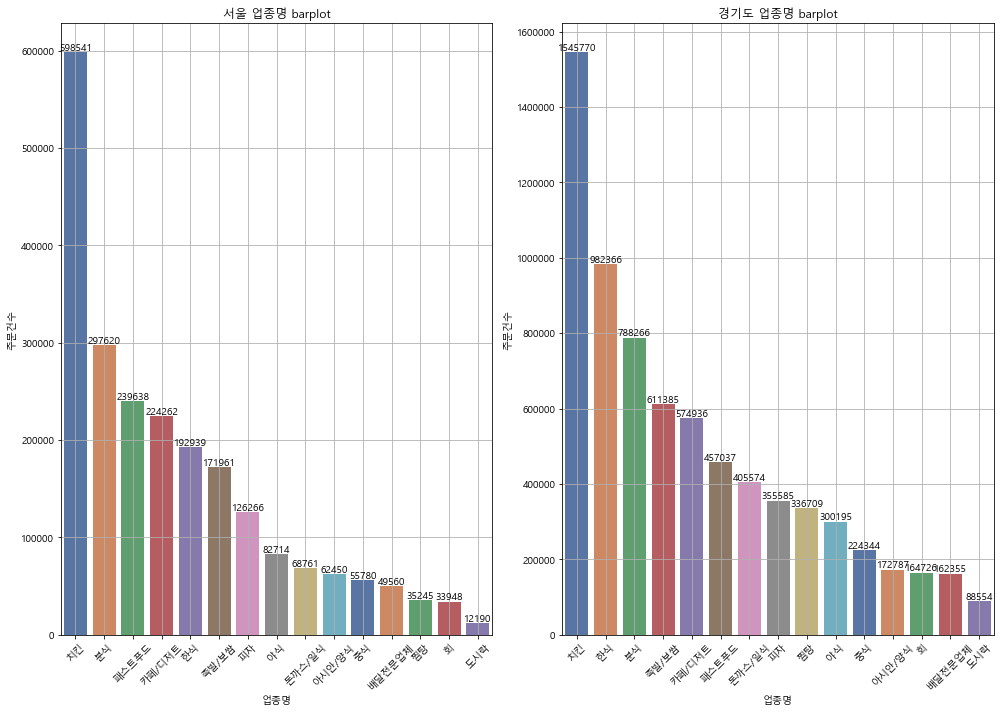

In [21]:
bar_plotting(df=final_data, X='업종명', aggfunc=sum, figsize=(14, 10))

###  2-2) 서울/경기 시간대별 전체 주문건수

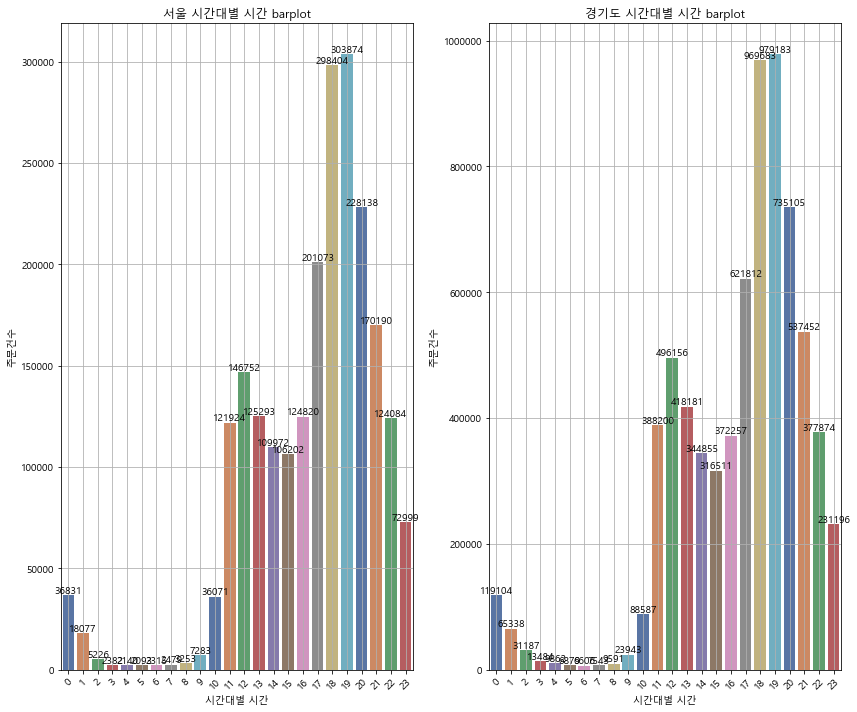

In [22]:
bar_plotting(df=final_data, X='시간대별 시간', aggfunc=sum)

###  2-3) 서울/경기 계절별 주문 건수

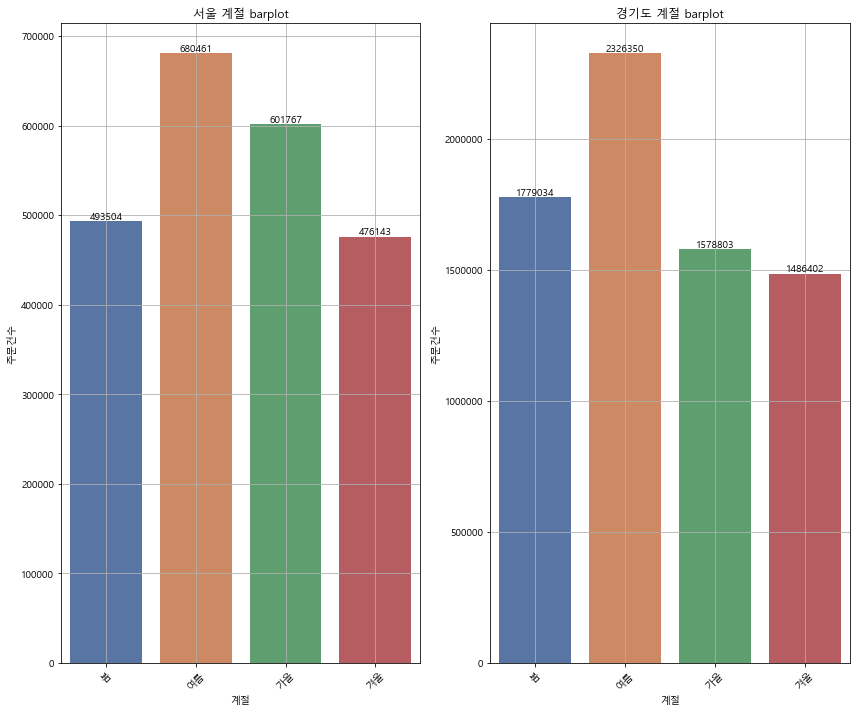

In [23]:
bar_plotting(df=final_data, X='계절', aggfunc=sum)

<AxesSubplot:xlabel='계절', ylabel='주문건수'>

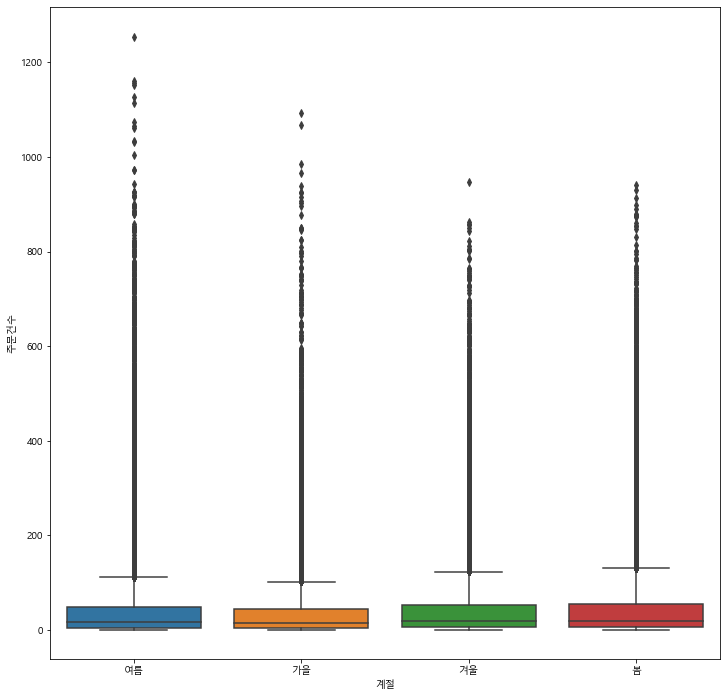

In [24]:
sns.boxplot(x='계절', y='주문건수', data=final_data)

<AxesSubplot:xlabel='계절', ylabel='주문건수'>

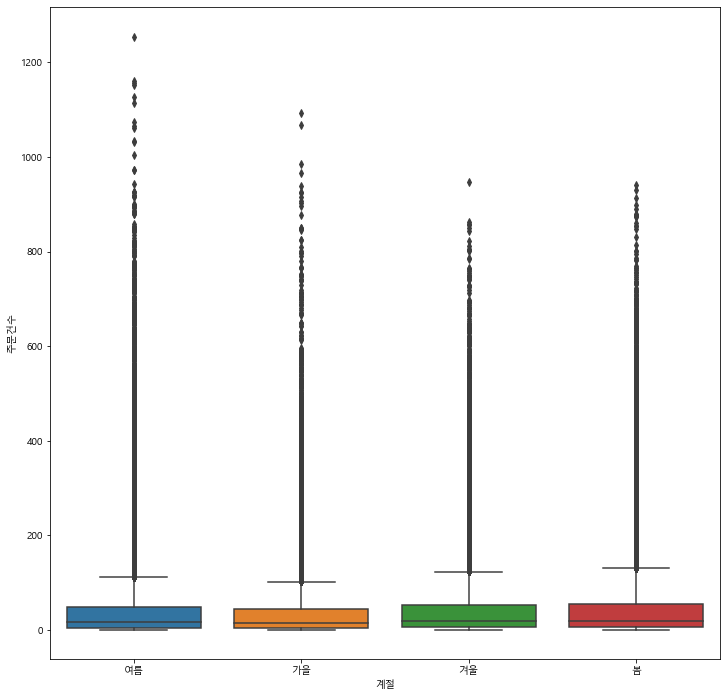

In [25]:
sns.boxplot(x='계절', y='주문건수', data=final_data)

<AxesSubplot:xlabel='기념일', ylabel='주문건수'>

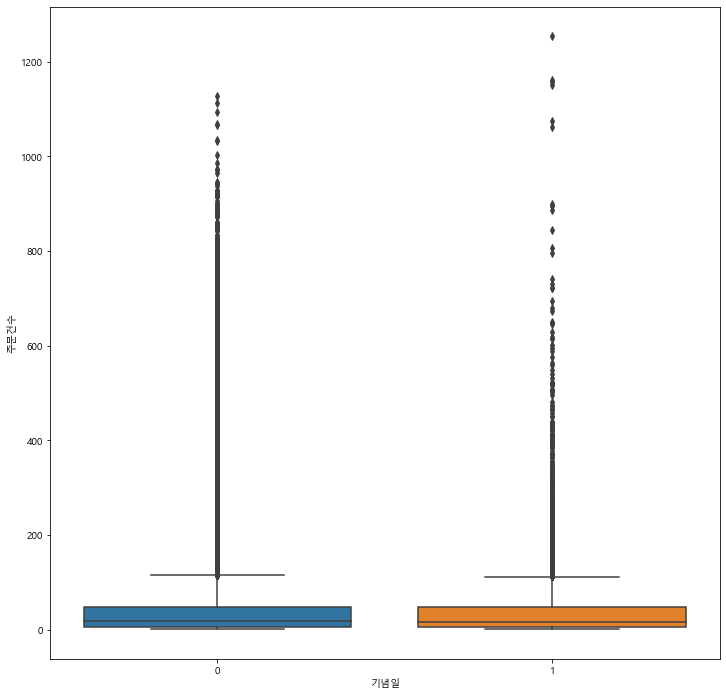

In [26]:
sns.boxplot(x='기념일', y='주문건수', data=final_data)

In [51]:

dummy_dict = {'요일': 'day', '시간대별 시간': 'time', '계절': 'season', '공휴일' : 'holiday', '기념일' : 'holiday2', '날씨' : 'climate', '눈비': 'rain_snow'}

def get_all_dummies(data=None, dummy_dict=None):
    df = pd.DataFrame()
    
    for dummy in list(dummy_dict.keys()):
        
        tmp_df = pd.get_dummies(data[dummy], prefix=dummy_dict[dummy])
        
        df = pd.concat([df, tmp_df], axis=1)
        
    return df



def get_concat_dummies(origin_data=None):
    
    dummy_data = get_all_dummies(data=origin_data, dummy_dict=dummy_dict)
    
    final_data = pd.concat([origin_data, dummy_data], axis=1)
    
    return final_data
        

In [52]:
final_df = get_concat_dummies(origin_data=final_data)

In [54]:
final_df.columns

Index(['광역시도명', '날짜', '요일', '시간대별 시간', '업종명', '계절', '공휴일', '기념일', '기온', '풍속',
       '습도', 'PM10', '운량', '날씨', '눈비', '강수량', '확진자수', '주문건수', 'year', 'month',
       'day_금', 'day_목', 'day_수', 'day_월', 'day_일', 'day_토', 'day_화', 'time_0',
       'time_1', 'time_2', 'time_3', 'time_4', 'time_5', 'time_6', 'time_7',
       'time_8', 'time_9', 'time_10', 'time_11', 'time_12', 'time_13',
       'time_14', 'time_15', 'time_16', 'time_17', 'time_18', 'time_19',
       'time_20', 'time_21', 'time_22', 'time_23', 'season_가을', 'season_겨울',
       'season_봄', 'season_여름', 'holiday_0', 'holiday_1', 'holiday_2',
       'holiday2_0', 'holiday2_1', 'climate_1', 'climate_2', 'climate_3',
       'climate_4', 'rain_snow_0', 'rain_snow_1'],
      dtype='object')

In [29]:
temp = pd.concat([final_data, dummies], axis=1)

temp.drop(list(dummy_dict.keys()), axis=1, inplace=True)

In [55]:
chicken = temp.loc[temp['업종명']=='치킨']

chicken_sl = chicken.loc[chicken['광역시도명']=='서울']
chicken_gg = chicken.loc[chicken['광역시도명']=='경기도']

In [56]:
chicken_sl_fin = chicken_sl.drop(['광역시도명', '업종명', '날짜'], axis=1)
chicken_gg_fin = chicken_gg.drop(['광역시도명', '업종명', '날짜'], axis=1)

In [57]:
chicken_gg_fin

,기온,풍속,습도,PM10,운량,강수량,확진자수,주문건수,year,month,...,holiday_1,holiday_2,holiday2_0,holiday2_1,climate_1,climate_2,climate_3,climate_4,rain_snow_0,rain_snow_1
73029,22.86,0.54,91.2,79.512,6.4,0.0,0.0,19,2019,7,...,0,0,1,0,0,0,1,0,1,0
73030,22.48,0.52,92.2,57.704,7.2,0.0,0.0,16,2019,7,...,0,0,1,0,0,0,1,0,1,0
73031,22.32,0.62,94.0,61.753,7.8,0.0,0.0,5,2019,7,...,0,0,1,0,0,0,1,0,1,0
73032,22.30,0.50,95.0,59.707,7.8,0.0,0.0,1,2019,7,...,0,0,1,0,0,0,1,0,1,0
73033,22.16,0.68,95.8,56.691,7.4,0.0,0.0,1,2019,7,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82279,19.06,1.38,80.8,34.465,7.4,0.0,19.0,461,2020,9,...,1,0,1,0,0,0,1,0,1,0
82280,17.96,0.68,85.2,32.687,6.4,0.0,19.0,402,2020,9,...,1,0,1,0,0,0,1,0,1,0
82281,17.36,0.96,87.4,31.051,5.2,0.0,19.0,346,2020,9,...,1,0,1,0,0,0,0,1,1,0
82282,16.78,0.92,89.8,30.242,5.0,0.0,19.0,294,2020,9,...,1,0,1,0,0,1,0,0,1,0


In [58]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


y_target = chicken_gg_fin['주문건수']
X_features = chicken_gg_fin.drop('주문건수', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, np.log1p(y_target), test_size=0.2, random_state=156)

In [59]:
lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9642775171042485

In [60]:
lr.coef_

array([-1.26668608e-02,  6.62951963e-03, -3.91837474e-04, -3.51353423e-04,
        7.33078723e-03,  1.03268926e-02,  1.01696654e-03,  6.97854698e-01,
        6.64952761e-02, -1.91395521e+09, -1.91395521e+09, -1.91395521e+09,
       -1.91395521e+09, -1.91395521e+09, -1.91395521e+09, -1.91395521e+09,
        6.70334231e+08,  6.70334230e+08,  6.70334229e+08,  6.70334228e+08,
        6.70334228e+08,  6.70334228e+08,  6.70334227e+08,  6.70334227e+08,
        6.70334227e+08,  6.70334227e+08,  6.70334228e+08,  6.70334230e+08,
        6.70334231e+08,  6.70334231e+08,  6.70334231e+08,  6.70334231e+08,
        6.70334231e+08,  6.70334232e+08,  6.70334233e+08,  6.70334233e+08,
        6.70334233e+08,  6.70334232e+08,  6.70334232e+08,  6.70334232e+08,
        4.14461528e+10,  4.14461528e+10,  4.14461528e+10,  4.14461528e+10,
        5.67339125e+09,  5.67339125e+09,  5.67339125e+09, -2.78417610e+09,
       -2.78417610e+09,  1.08093254e+09,  1.08093254e+09,  1.08093254e+09,
        1.08093254e+09, -

In [61]:
for column, coef in zip(X_features.columns, lr.coef_):
    print(column, np.round(coef, 3))

기온 -0.013
풍속 0.007
습도 -0.0
PM10 -0.0
운량 0.007
강수량 0.01
확진자수 0.001
year 0.698
month 0.066
day_금 -1913955205.339
day_목 -1913955205.46
day_수 -1913955205.424
day_월 -1913955205.469
day_일 -1913955205.182
day_토 -1913955205.193
day_화 -1913955205.48
time_0 670334230.956
time_1 670334230.303
time_2 670334229.299
time_3 670334228.137
time_4 670334227.802
time_5 670334227.692
time_6 670334227.483
time_7 670334227.265
time_8 670334227.242
time_9 670334227.422
time_10 670334227.881
time_11 670334229.916
time_12 670334230.777
time_13 670334230.855
time_14 670334230.858
time_15 670334230.996
time_16 670334231.411
time_17 670334232.106
time_18 670334232.666
time_19 670334232.731
time_20 670334232.52
time_21 670334232.309
time_22 670334232.092
time_23 670334231.672
season_가을 41446152838.159
season_겨울 41446152838.257
season_봄 41446152838.268
season_여름 41446152838.314
holiday_0 5673391252.931
holiday_1 5673391252.901
holiday_2 5673391253.014
holiday2_0 -2784176100.874
holiday2_1 -2784176100.836
climate_1 

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [63]:
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

0.9642833811575999

In [64]:
for column, coef in zip(X_features.columns, lr.coef_):
    print(column, np.round(coef, 3))

기온 -0.608
풍속 0.061
습도 -0.033
PM10 -0.08
운량 0.073
강수량 0.258
확진자수 0.126
year 0.698
month 0.731
day_금 -7972785191.224
day_목 -7972785191.345
day_수 -7972785191.309
day_월 -7972785191.354
day_일 -7972785191.067
day_토 -7972785191.078
day_화 -7972785191.365
time_0 -40974558724.023
time_1 -40974558724.677
time_2 -40974558725.679
time_3 -40974558726.841
time_4 -40974558727.176
time_5 -40974558727.287
time_6 -40974558727.495
time_7 -40974558727.714
time_8 -40974558727.737
time_9 -40974558727.557
time_10 -40974558727.098
time_11 -40974558725.067
time_12 -40974558724.202
time_13 -40974558724.124
time_14 -40974558724.121
time_15 -40974558723.978
time_16 -40974558723.57
time_17 -40974558722.873
time_18 -40974558722.314
time_19 -40974558722.246
time_20 -40974558722.459
time_21 -40974558722.668
time_22 -40974558722.887
time_23 -40974558723.306
season_가을 452206496314.576
season_겨울 452206496314.674
season_봄 452206496314.685
season_여름 452206496314.731
holiday_0 189194043965.888
holiday_1 189194043965.858
hol

In [65]:
ridge = Ridge()

ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.9642339826105181

In [41]:
for column, coef in zip(X_features.columns, ridge.coef_):
    print(column, np.round(coef, 3))

기온 -0.001
풍속 -0.005
습도 0.001
PM10 0.002
운량 0.002
강수량 -0.002
확진자수 -0.006
year 1.151
month 0.123
day_금 -0.04
day_목 -0.065
day_수 -0.059
day_월 -0.086
day_일 0.187
day_토 0.119
day_화 -0.057
time_0 -0.114
time_1 -0.327
time_2 -0.598
time_3 -0.698
time_4 -0.85
time_5 -1.166
time_6 -1.184
time_7 -1.126
time_8 -1.038
time_9 -0.731
time_10 -0.023
time_11 0.784
time_12 0.819
time_13 0.611
time_14 0.319
time_15 0.134
time_16 0.19
time_17 0.578
time_18 1.056
time_19 1.169
time_20 0.937
time_21 0.653
time_22 0.422
time_23 0.183
season_가을 -0.242
season_겨울 -0.076
season_봄 0.282
season_여름 0.036
holiday_0 -0.044
holiday_1 0.015
holiday_2 0.029
holiday2_0 0.025
holiday2_1 -0.025
climate_1 0.007
climate_2 0.015
climate_3 -0.014
climate_4 -0.007
rain_snow_0 0.017
rain_snow_1 -0.017


In [66]:
from sklearn.ensemble import RandomForestRegressor


rf_lr = RandomForestRegressor(max_depth=10)

rf_lr.fit(X_train, y_train)


rf_lr.score(X_train, y_train)


0.8893708137197107

In [43]:
rf_lr.score(X_test, y_test)

0.6460822562584061